Step 02: the EEG dataset has resampled by rehsaping technique. The first column has taken in order to down-sample the dataset.

In [1]:
import pyedflib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pyedflib.EdfReader('./PSG_dataset/A0000724.edf') # reading PSG file

In [3]:
channel_n = 6 # number of channels

In [4]:
print('Shape of 200 Hz channel: {}' .format(np.shape(data.readSignal(2))))
data_reshape = np.array(data.readSignal(2)).reshape(int(len(data.readSignal(2))/2),2) # EEG data reshaping
print('Shape of 200 Hz channel after reshaping: {}' .format(data_reshape.shape))
print('Shape of 200 Hz channel after down-sampling: {}' .format(data_reshape[:,0].shape))

Shape of 200 Hz channel: (5725000,)
Shape of 200 Hz channel after reshaping: (2862500, 2)
Shape of 200 Hz channel after down-sampling: (2862500,)


In [5]:
#function of data resampling
def resampling(indata, channel_n):
    # assigning shape of resultant array
    if indata.getSampleFrequency(0) == 100:
        data_samp = np.empty((0, len(indata.readSignal(0))))
    elif indata.getSampleFrequency(0) == 200:
        data_samp = np.empty((0, int(len(indata.readSignal(0))/2)))
        
    for chn in range(channel_n): 
        
        if indata.getSampleFrequency(chn) == 100: #sampling frequency = 100 Hz    
            data_samp = np.append(data_samp, [indata.readSignal(chn)], axis=0)
            
        elif indata.getSampleFrequency(chn) == 200: #sampling frequency = 200 Hz
            # data reshaping and taking first column to down-sample data
            data_reshap = np.array(indata.readSignal(chn)).reshape(int(len(indata.readSignal(chn))/2),2)
            data_samp = np.append(data_samp, [data_reshap[:,0]], axis=0) 
            
    return data_samp

In [6]:
data_s = resampling(data, channel_n) # resampling data
print('The shape of down-sampled data: {}' .format(np.shape(data_s)))

The shape of down-sampled data: (6, 2862500)


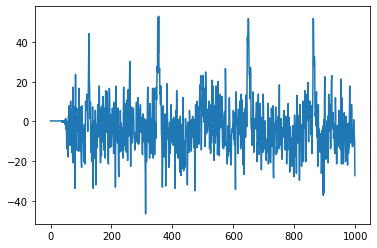

In [7]:
plt.plot(data_s[0][0:1000])

In [8]:
len(data_s[0][0:255])

255